In [93]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import pathlib

In [94]:
train_dir = pathlib.Path('./Bird_Dataset/train')
val_dir = pathlib.Path('./Bird_Dataset/valid')
test_dir = pathlib.Path('./Bird_Dataset/test')

train_image_count = len(list(train_dir.glob('*/*.jpg')))
print(train_image_count)

47332


In [95]:
batch_size = 32
image_width = 224
image_height = 224

#creates a complete dataset from directory structure ready to use
train_ds = keras.preprocessing.image_dataset_from_directory(
    train_dir,
    batch_size = batch_size,
    image_size = (image_width, image_height)
)

val_ds = keras.preprocessing.image_dataset_from_directory(
    val_dir,
    batch_size = batch_size,
    image_size = (image_width, image_height)
)

test_ds = keras.preprocessing.image_dataset_from_directory(
    test_dir,
    batch_size = batch_size,
    image_size = (image_width, image_height)
)


Found 47332 files belonging to 325 classes.
Found 1625 files belonging to 325 classes.
Found 1625 files belonging to 325 classes.


In [96]:
class_names = train_ds.class_names

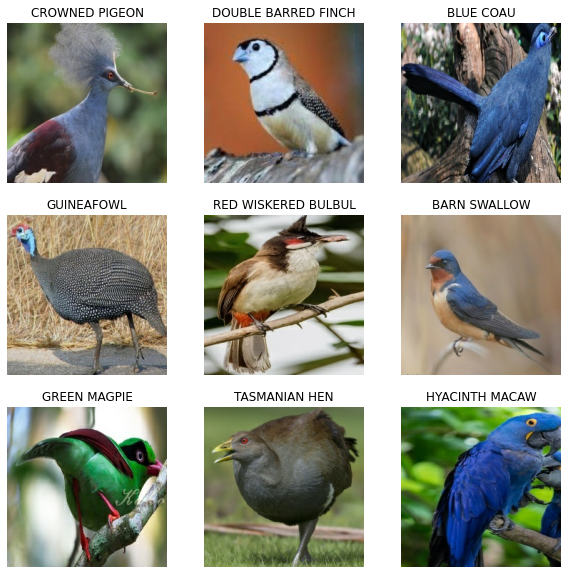

In [97]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [98]:
def create_model(input_shape=(image_width,image_height,3)):
  model = keras.Sequential([
  layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu', padding = 'same', input_shape = input_shape),
  layers.MaxPool2D(pool_size = 2),
  
  layers.Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same'),
  layers.MaxPool2D(pool_size = 2),
    
  layers.Conv2D(filters = 128, kernel_size = 3, activation = 'relu', padding = 'same'),
  layers.MaxPool2D(pool_size = 2),
    
  layers.Flatten(),
  layers.Dense(units = 54, activation = 'relu'),
  layers.Dense(units = 10, activation = 'softmax')])
    
  return model

In [99]:
def compile_model(model, optimizer = 'adam', loss='categorical_crossentropy'):
  model.compile(optimizer=optimizer,loss=loss,metrics=["accuracy"])

In [100]:
def fitting_model(model, x, y, epoch):
  model.fit(x,y,shuffle=True, epochs=epoch)

In [101]:
print(type(train_ds))
train_ds = np.asarray(train_ds)
print(type(train_ds))

val_ds = np.asarray(val_ds)

test_ds = np.asarray(test_ds)

model = create_model((image_width, image_height,3))
compile_model(model, 'adam', 'categorical_crossentropy')

print(type(train_ds))
print(type(val_ds))
history = model.fit(train_ds, validation_data=val_ds, epochs=20)
model.save("tf_cnn_fashion_mnist.model")

<class 'tensorflow.python.data.ops.dataset_ops.BatchDataset'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type BatchDataset).